In [1]:
import urllib, zipfile, os

In [2]:
project_path = 'C:/Users/mneskovic/Desktop/project/'
os.chdir(project_path) # just in case
data_url = 'https://data.london.gov.uk/download/smartmeter-energy-use-data-in-london-households/3527bf39-d93e-4071-8451-df2ade1ea4f2/Power-Networks-LCL-June2015(withAcornGps).zip'
dataset_zip = 'SmartMeter_Energy_Consumption_Data_in_London_Households.zip'
dataset_name = 'Power-Networks-LCL-June2015(withAcornGps)v2.csv'
dataset_path = 'data/'+dataset_name

In [3]:
if os.path.exists(dataset_path):
    print('Data already downloaded and unpacked.')
else:
    os.chdir(project_path+'data/')
    urllib.request.urlretrieve(data_url, dataset_zip)
    print('Data downloaded.')
    with zipfile.ZipFile(dataset_zip, 'r') as z:
        z.extractall()
    print('Data unpacked.')
    os.chdir(project_path)

Data already downloaded and unpacked.


# Dataset description

Energy consumption readings for a sample of 5,567 London Households that took part in the UK Power Networks led Low Carbon London project between November 2011 and February 2014.

Readings were taken at half hourly intervals. Households have been allocated to a CACI Acorn group (2010).  The customers in the trial were recruited as a balanced sample representative of the Greater London population.

The dataset contains energy consumption, in kWh (per half hour), unique household identifier, date and time, and CACI Acorn group. The CSV file is around 10GB when unzipped and contains around 167million rows.

Within the data set are two groups of customers. The first is a sub-group, of approximately 1100 customers, who were subjected to Dynamic Time of Use (dToU) energy prices throughout the 2013 calendar year period.  The tariff prices were given a day ahead via the Smart Meter IHD (In Home Display) or text message to mobile phone. Customers were issued High (67.20p/kWh), Low (3.99p/kWh) or normal (11.76p/kWh) price signals and the times of day these applied. The dates/times and the price signal schedule is availaible as part of this dataset. All non-Time of Use customers were on a flat rate tariff of 14.228pence/kWh.

The signals given were designed to be representative of the types of signal that may be used in the future to manage both high renewable generation (supply following) operation and also test the potential to use high price signals to reduce stress on local distribution grids during periods of stress.

The remaining sample of approximately 4500 customers energy consumption readings were not subject to the dToU tariff.

In [4]:
import pandas as pd

In [5]:
headers = ['LCLid', 'stdorToU', 'DateTime', 'KWH_hh', 'Acorn', 'Acorn_grouped']
dtypes = {'LCLid': 'str',
          'stdorToU': 'str',
          'DateTime': 'str',
          'KWH_hh': 'float',
          'Acorn': 'str',
          'Acorn_grouped': 'str'}
parse_dates = ['DateTime']

data = pd.read_csv(dataset_path, header=None, names=headers, dtype=dtypes, parse_dates=parse_dates, 
                   skiprows=1, na_values=['Null'], keep_default_na=False)

In [6]:
data.shape

(167932474, 6)

In [7]:
data.head()

,LCLid,stdorToU,DateTime,KWH_hh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00,0.0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00,0.0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00,0.0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00,0.0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00,0.0,ACORN-A,Affluent


In [8]:
data.isna().sum(axis=0)

LCLid               0
stdorToU            0
DateTime            0
KWH_hh           5560
Acorn               0
Acorn_grouped       0
dtype: int64

In [ ]:
# data['KWH_hh'] = data['KWH_hh'].astype(float)
# 'Null' as na
# data[data['KWH_hh']=='Null']#.shape[0]
# remove rows with 'Null'
# data = data[data['KWH_hh'] != 'Null']
# data['KWH_hh'] = data['KWH_hh'].astype(float)

In [8]:
data.dropna(inplace=True)

In [9]:
# small number of mesures for some households
data['LCLid'].value_counts().nsmallest(10)
# ? remove nsmallest(5)

MAC005565      44
MAC001300     360
MAC002110     478
MAC001278     506
MAC001957     604
MAC003346    4159
MAC001653    4275
MAC003353    5066
MAC003554    5164
MAC003559    5812
Name: LCLid, dtype: int64

In [45]:
data.groupby(['LCLid'])['DateTime'].apply(lambda x: x.max() - x.min()).nsmallest(10)

LCLid
MAC005565     0 days 21:30:00
MAC001300     8 days 11:00:00
MAC002110     9 days 22:00:00
MAC001278    10 days 12:00:00
MAC001957    14 days 13:00:00
MAC003346    86 days 13:30:00
MAC003353   105 days 13:00:00
MAC003554   107 days 11:30:00
MAC003559   120 days 23:30:00
MAC003935   123 days 23:00:00
Name: DateTime, dtype: timedelta64[ns]

In [47]:
# check if some hosehold were in both types of pricing
data.groupby(['LCLid'])['stdorToU'].nunique().nlargest(1)

LCLid
MAC000002    1
Name: stdorToU, dtype: int64

In [46]:
# number of households per pricing type
data.groupby(['stdorToU'])['LCLid'].nunique()

stdorToU
Std    4438
ToU    1123
Name: LCLid, dtype: int64

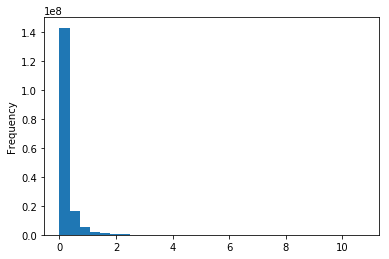

In [55]:
data['KWH_hh'].plot.hist(bins=30)

## Acorn User Guide
There is more ACORN types then in user guide - https://acorn.caci.co.uk/downloads/Acorn-User-guide.pdf

In [47]:
data.Acorn.unique()
# ACORN- == UNKNOWN ACORN == ACORN-U ?
# ACORN-U does not exist in user guide

array(['ACORN-A', 'ACORN-P', 'ACORN-E', 'ACORN-Q', 'ACORN-H', 'ACORN-L',
       'ACORN-N', 'ACORN-K', 'ACORN-J', 'ACORN-U', 'ACORN-D', 'ACORN-F',
       'ACORN-G', 'ACORN-C', 'ACORN-M', 'ACORN-O', 'ACORN-I', 'ACORN-B',
       'ACORN-'], dtype=object)

In [58]:
data.Acorn_grouped.unique()

array(['Affluent', 'Adversity', 'Comfortable', 'ACORN-U', 'ACORN-'],
      dtype=object)

In [67]:
print(data.loc[data.Acorn=='ACORN-'].LCLid.unique(), '\n',
      data.loc[data.Acorn_grouped=='ACORN-'].LCLid.unique(), '\n',
      data.loc[data.Acorn=='ACORN-U'].LCLid.unique(), '\n',
      data.loc[data.Acorn_grouped=='ACORN-U'].LCLid.unique())
# ACORN- & ACORN-U for the same households

['MAC001074' 'MAC005492'] 
 ['MAC001074' 'MAC005492'] 
 ['MAC000023' 'MAC000099' 'MAC001256' 'MAC001348' 'MAC001600' 'MAC001795'
 'MAC001997' 'MAC002056' 'MAC002087' 'MAC002152' 'MAC002485' 'MAC002647'
 'MAC002720' 'MAC003078' 'MAC003163' 'MAC003218' 'MAC003317' 'MAC003328'
 'MAC003407' 'MAC003619' 'MAC003780' 'MAC003860' 'MAC003884' 'MAC003992'
 'MAC004010' 'MAC004067' 'MAC004069' 'MAC004142' 'MAC004215' 'MAC004515'
 'MAC004570' 'MAC004587' 'MAC004649' 'MAC004672' 'MAC004788' 'MAC004828'
 'MAC005036' 'MAC005363' 'MAC005424' 'MAC001147' 'MAC001704' 'MAC001706'
 'MAC001851' 'MAC002774' 'MAC003652' 'MAC003916' 'MAC003977' 'MAC004323'
 'MAC004467'] 
 ['MAC000023' 'MAC000099' 'MAC001256' 'MAC001348' 'MAC001600' 'MAC001795'
 'MAC001997' 'MAC002056' 'MAC002087' 'MAC002152' 'MAC002485' 'MAC002647'
 'MAC002720' 'MAC003078' 'MAC003163' 'MAC003218' 'MAC003317' 'MAC003328'
 'MAC003407' 'MAC003619' 'MAC003780' 'MAC003860' 'MAC003884' 'MAC003992'
 'MAC004010' 'MAC004067' 'MAC004069' 'MAC004142' 'MA

In [49]:
# one household can have only one of stdorToU, ACRON and ACORN group
print(data.LCLid.nunique())
print(data[['LCLid', 'stdorToU', 'Acorn', 'Acorn_grouped']].drop_duplicates().shape[0])

5561
5561


In [18]:
# separate pricing type and ACRON types to another file and remove exported columns
data[['LCLid', 'stdorToU', 'Acorn', 'Acorn_grouped']].drop_duplicates().to_csv('data/pricing_and_acron_types.csv', index=False)
data.drop(['stdorToU', 'Acorn', 'Acorn_grouped'], axis=1, inplace=True)

In [7]:
data.drop(['stdorToU', 'Acorn', 'Acorn_grouped'], axis=1, inplace=True)

In [12]:
data.head(48)

,LCLid,DateTime,KWH_hh
0,MAC000002,2012-10-12 00:30:00,0.000
1,MAC000002,2012-10-12 01:00:00,0.000
2,MAC000002,2012-10-12 01:30:00,0.000
3,MAC000002,2012-10-12 02:00:00,0.000
4,MAC000002,2012-10-12 02:30:00,0.000
5,MAC000002,2012-10-12 03:00:00,0.000
6,MAC000002,2012-10-12 03:30:00,0.000
7,MAC000002,2012-10-12 04:00:00,0.000
8,MAC000002,2012-10-12 04:30:00,0.000
9,MAC000002,2012-10-12 05:00:00,0.000


In [24]:
data.sort_values(by=['LCLid', 'DateTime'], inplace=True)
# already looks sorted

In [1]:
#data.to_csv('data/consumption_per_datetime.csv', index=False)
#import pandas as pd
#dtypes = {'LCLid': 'str', 'DateTime': 'str', 'KWH_hh': 'float'}
#parse_dates = ['Date']
#consumption_per_datetime = pd.read_csv('data/consumption_per_datetime.csv', dtype=dtypes, parse_dates=parse_dates)

In [8]:
import pickle as pkl
with open('data/consumption_per_datetime.pickle', 'wb') as handle:
    pkl.dump(data, handle)

In [1]:
import pandas as pd
import pickle as pkl
with open('data/consumption_per_datetime.pickle', 'rb') as handle:
    data = pkl.load(handle)

## Tag rows by part of the day: night 00:00-05:30, morning 06:00-11:30, midday 12:00-17:30, evening 18:00-23:30

Average Daily Consumption in domestic - Chapter 3 Domestic Data Tables, sheet 3.11 - https://webarchive.nationalarchives.gov.uk/20150503104649/https://www.gov.uk/government/statistics/energy-consumption-in-the-uk

In [3]:
data.set_index('DateTime', inplace=True)

In [18]:
# ubaciti petlju
overall_agg = \
    data.groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum', 'count', lambda x: (x.index.max() - x.index.min()).days]) \
    .rename(columns={'min':'overall_min', 'max':'overall_max', 'median':'overall_med', 'mean':'overall_min', 'std':'overall_std', 'var':'overall_var', 'sum':'overall_sum', '<lambda>':'duration_in_days'})

night = \
    data.between_time('00:00:00', '05:30:00') \
    .groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .rename(columns={'min':'night_min', 'max':'night_max', 'median':'night_med', 'mean':'night_min', 'std':'night_std', 'var':'night_var', 'sum':'night_sum'})

morning_agg = \
    data.between_time('06:00:00', '11:30:00') \
    .groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .rename(columns={'min':'morning_min', 'max':'morning_max', 'median':'morning_med', 'mean':'morning_min', 'std':'morning_std', 'var':'morning_var', 'sum':'morning_sum'})

midday_agg = \
    data.between_time('12:00:00', '17:30:00') \
    .groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .rename(columns={'min':'midday_min', 'max':'midday_max', 'median':'midday_med', 'mean':'midday_min', 'std':'midday_std', 'var':'midday_var', 'sum':'midday_sum'})

evening_agg = \
    data.between_time('18:00:00', '23:30:00') \
    .groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .rename(columns={'min':'evening_min', 'max':'evening_max', 'median':'evening_med', 'mean':'evening_min', 'std':'evening_std', 'var':'evening_var', 'sum':'evening_sum'})


## Aggregate per month and week for each household.

In [23]:
data.reset_index(inplace=True)

In [24]:
data['week'] = data.DateTime.dt.week
data['month'] = data.DateTime.dt.month
data['year'] = data.DateTime.dt.year

In [94]:
by_month = data.groupby(['LCLid', 'year', 'month'])['KWH_hh'] \
.agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
.reset_index() \
.melt(id_vars=['LCLid', 'year', 'month'], value_vars=['min', 'max', 'median', 'mean', 'std', 'var', 'sum'])

by_month['month_year'] = 'm' + by_month['month'].map(str) + '_' + by_month['year'].map(str) + '_' + by_month['variable']
by_month.drop(['year', 'month', 'variable'], axis=1, inplace=True)

by_month = by_month.pivot_table(index=['LCLid'], columns=['month_year'], values=['value'])
by_month.columns = by_month.columns.droplevel()

In [102]:
by_week = data.groupby(['LCLid', 'year', 'week'])['KWH_hh'] \
.agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
.reset_index() \
.melt(id_vars=['LCLid', 'year', 'week'], value_vars=['min', 'max', 'median', 'mean', 'std', 'var', 'sum'])

by_week['week_year'] = 'w' + by_week['week'].map(str) + '_' + by_week['year'].map(str) + '_' + by_week['variable']
by_week.drop(['year', 'week', 'variable'], axis=1, inplace=True)

by_week = by_week.pivot_table(index=['LCLid'], columns=['week_year'], values=['value'])
by_week.columns = by_week.columns.droplevel()

In [99]:
data_agg = \
    overall_agg \
    .join(night_agg, on='LCLid', how='left') \
    .join(morning_agg, on='LCLid', how='left') \
    .join(midday_agg, on='LCLid', how='left') \
    .join(evening_agg, on='LCLid', how='left') \
    .join(by_month, on='LCLid', how='left') \
    .join(by_week, on='LCLid', how='left')

In [101]:
with open('data/data_agg.pickle', 'wb') as handle:
    pkl.dump(data_agg, handle)

In [103]:
data_agg.to_csv('data/data_agg.csv', index=False)

In [105]:
data.drop(['week', 'month', 'year'], axis=1, inplace=True)

## Aggregate per day for each household.

In [ ]:
data['Date'] = data.DateTime.dt.date
data.drop(['DateTime'], axis=1, inplace=True)

In [114]:
data_agg_daily = \
    data.groupby(['LCLid', 'Date'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .reset_index() \
    .melt(id_vars=['LCLid', 'Date'], value_vars=['min', 'max', 'median', 'mean', 'std', 'var', 'sum'])

In [116]:
data_agg_daily['date_agg'] = data_agg_daily['Date'].map(str) + '_' + data_agg_daily['variable']

data_agg_daily.drop(['Date', 'variable'], axis=1, inplace=True)

data_agg_daily = data_agg_daily.pivot_table(index=['LCLid'], columns=['date_agg'], values=['value'])

data_agg_daily.columns = data_agg_daily.columns.droplevel()

In [124]:
with open('data/data_agg_daily.pickle', 'wb') as handle:
    pkl.dump(data_agg_daily, handle)

In [125]:
data_agg_daily.to_csv('data/data_agg_daily.csv', index=False)